In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

(569, 30)
(569,)


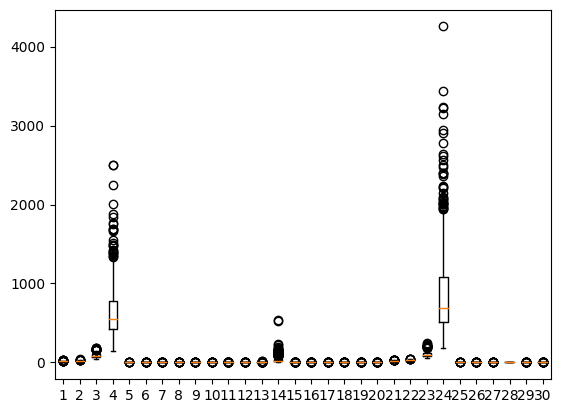

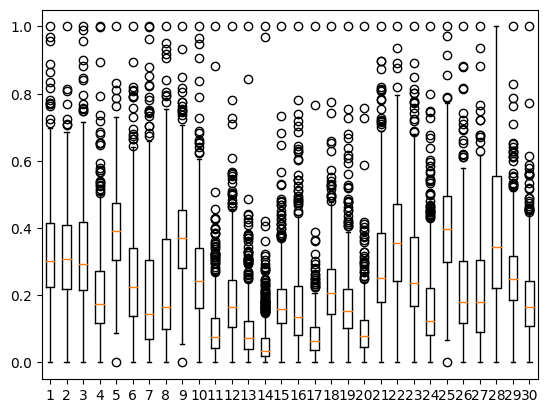

In [4]:
cancer = load_breast_cancer()

print(cancer.data.shape) # 
print(cancer.target.shape) # 0이 악성종양, 1이면 양성종양

x_data = cancer.data
t_data = cancer.target

plt.boxplot(x_data)
plt.show()

#결측치는 없구요 
#이상치는 처리안함 박스플롯에서는 이상치지만 실제데이터는 아님
# 정규화 해야함
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

plt.boxplot(x_data_norm)
plt.show()

In [5]:
x_data_train_norm, x_data_test_norm ,t_data_train, t_data_test = train_test_split(x_data_norm,t_data
                                                                                  ,stratify=t_data
                                                                                  ,test_size=0.2  # default 0.25
                                                                                  ,random_state=3)
np.unique(t_data_test, return_counts=True)

(array([0, 1]), array([42, 72], dtype=int64))

In [6]:
sklearn_model = linear_model.LogisticRegression()

score = cross_val_score(sklearn_model, x_data_train_norm, t_data_train, cv= 5)
print(score)
print(f'sklearn의 평균 validation accuracy : {np.mean(score)}')
# 0.9626373626373625

sklearn_model.fit(x_data_train_norm,
                  t_data_train)
#정확도 검사
test_score = sklearn_model.score(x_data_test_norm,t_data_test)
print(f'모델의 최종 score {test_score}')

[0.97802198 0.94505495 0.95604396 0.98901099 0.94505495]
sklearn의 평균 validation accuracy : 0.9626373626373625
모델의 최종 score 0.9649122807017544


In [16]:
# tensorflow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

keras_model = Sequential()
keras_model.add(Flatten(input_shape = (30,)))
keras_model.add(Dense(units = 1,
                      activation = 'sigmoid'))
#학습할 때 매 epoch마다 validation을 수행
# validation 평가 기준은 accuracy를 사용
keras_model.compile(optimizer = Adam(learning_rate=1e-1),
                    loss = 'binary_crossentropy',
                    metrics = ['acc'])
keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs = 300,
                verbose = 1,
                validation_split = 0.2)
#gpu 19s
#cpu 12.1s
#15 , 17, 17

Epoch 1/300
12/12 [==============================] - 0s 13ms/step - loss: 0.5327 - acc: 0.8022 - val_loss: 0.4265 - val_acc: 0.8132
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 0.3530 - acc: 0.9038 - val_loss: 0.3058 - val_acc: 0.9011
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 0.2682 - acc: 0.9176 - val_loss: 0.2894 - val_acc: 0.8791
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 0.2345 - acc: 0.9121 - val_loss: 0.2448 - val_acc: 0.9011
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 0.2102 - acc: 0.9341 - val_loss: 0.2339 - val_acc: 0.9011
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 0.1983 - acc: 0.9286 - val_loss: 0.2067 - val_acc: 0.9231
Epoch 7/300
12/12 [==============================] - 0s 5ms/step - loss: 0.1821 - acc: 0.9396 - val_loss: 0.1962 - val_acc: 0.9011
Epoch 8/300
12/12 [==============================] - 0s 5ms/step - loss: 0.1693 - 

In [14]:
result = keras_model.evaluate(x_data_test_norm,
                              t_data_test)
print(result)

#이 코드가 케라스 모델의 가장 기본 형태

4/4 [==============================] - 0s 2ms/step - loss: 0.1370 - acc: 0.9649
[0.13702407479286194, 0.9649122953414917]


In [5]:
import tensorflow as tf
tf.test.is_gpu_available()
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import tensorflow as tf

print(tf.__version__)


tf.config.list_physical_devices('GPU')

2.6.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1530839131834970749,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3665166336
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16142843122946319937
 physical_device_desc: "device: 0, name: GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs:", gpus)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('CPU')
print("Available GPUs:", gpus)

Available GPUs: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("Name:", gpu.name)
        print("Device type:", gpu.device_type)
else:
    print("No GPU devices found.")

Name: /physical_device:GPU:0
Device type: GPU
